# Formular la pregunta

### "Cuál es la probabilidad que un tweet que se origina dentro de las coordenadas geograficas (-78.31, 0.44, -70.71, 11.39) contenga al menos una ocurrencia de la palabra 'yo' con cualquier composición de acentos y letras minúsculas y mayúsculas."

![](http://mediossociales.es/wp-content/uploads/2012/01/twitter_futbol12.jpg)

# Recopilar datos

In [1]:
import os

import tweepy
from tweepy import Stream

from stream_listener import FiniteStreamListener

### Cargar credenciales

In [2]:
CONSUMER_KEY = "oqjRFuwiRLGD4Kjt650DmbN4C"
CONSUMER_SECRET = "r3e8Sd3AYKUxEBTGBzOXkA8zjwwTQUU3YOPIkvMjXbAZT6Fc4u"
ACCESS_TOKEN = "131293960-7OYlqpyEKyz72b7xDpZ3WBzKxAffFY0ieVUCFXIQ"
ACCESS_TOKEN_SECRET = "85DwbXbCJwSxSlgqSE9IOPpJc1m0unQZdkucKMuQQFuTd"

In [3]:
CONSUMER_SECRET

'r3e8Sd3AYKUxEBTGBzOXkA8zjwwTQUU3YOPIkvMjXbAZT6Fc4u'

In [4]:
COLOMBIA_GEO_LOCATION_BOUNDING_BOX = [-78.31, 0.44, -70.71, 11.39]
NUMBER_OF_TWEETS = 100

In [5]:
#Creamos una instancia de tweepy, para enviarle las credenciales de mi app
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth)

In [6]:
api

### Establecer una conexión al API de Twitter

In [7]:
#Creamos una isntancia  de la clase FiniteStreamListener, y le enviamos como parametro el numero de tweets que queremos obtener, esto nos permitira setear los valores que necesitamos para establecer una conexion al API de Tw

finite_stream_listener = FiniteStreamListener(number_of_tweets=NUMBER_OF_TWEETS)
#leer documentacion de twitter
streaming_api = Stream(auth=auth, listener=finite_stream_listener)

### Sorber del firehouse

In [9]:
#crea un filtro para la obtencion de tweets, el filtro de la localizacion
streaming_api.filter(locations=COLOMBIA_GEO_LOCATION_BOUNDING_BOX)

# Limpiar datos

In [11]:
from unidecode import unidecode

### Definir funciones de limpieza

In [88]:
#coloca todo en minusculas
def make_lowercase(tweet):
    return tweet.lower()

#elimina los acentos
def remove_diacritics(tweet):
    return unidecode(tweet)

#dejar solo los caracteres del alfabeto, quitar numeros, sin puntuacion ni signos!
def remove_non_alpha_characters(tweet):
    return ''.join(character for character in tweet if character.isalpha() or character == ' ' or character == ' \n ' or character == '@')

### Aplicar las funciones

In [90]:
cleaned_tweets = list(finite_stream_listener.tweets)

for cleaning_function in [make_lowercase,remove_diacritics,  remove_non_alpha_characters]:
    cleaned_tweets = [cleaning_function(tweet) for tweet in cleaned_tweets]

In [91]:
#Tweets sin limpieza de datos:
#finite_stream_listener.tweets

#Tweets con la limpieza de datos:
cleaned_tweets


['ataques ataques  httpstcoicmqtqmi',
 '@saraluna mk que viajecito a diario',
 '@fderecha @alexbernalradio @petrogustavo @moisesalvaro @gustavobolivar @intiasprilla @danmedina @cloquis @ismene httpstcoapnrsugu',
 '@gatamadurasw hola tuu gata',
 'hachas en piedra  guadua y cuero   y   en sesquile httpstcokdvljhb',
 'que linda te vesintentando entre tus anhelos verque linda te vesen mis brazos otra vezfelizmiercoles httpstcovmouhlfy',
 'no siento emociones ni temblores',
 'divina te mando un abrazo super fuerte  httpstcofrewstl',
 '@aspasiasegunda tal cual ayer de medias nueves me comi un strudel y una taza de chocolate caliente que groseria httpstcoggejst',
 'i dont ever want to feel like i did that daytake me to the place i love take me all the way at le httpstcospevvejx',
 'nomaslosmismosdesiempre httpstcomzjkogwv',
 ' felizmiercoles httpstcoaimyhczzs',
 '@asodeporcali @orsomarsosc que vaina con este equipo',
 'dificil esconder el cuerpo httpstcoipjjhvex',
 'super confiteria rr trabaj

# Dormir con tus datos

In [92]:
#%matplotlib inline

from pprint import pprint
import pandas as pd

In [93]:
KEYWORD = ' yo '

### Primeros 10 tweets

In [94]:
pprint(cleaned_tweets[:10])

['ataques ataques  httpstcoicmqtqmi',
 '@saraluna mk que viajecito a diario',
 '@fderecha @alexbernalradio @petrogustavo @moisesalvaro @gustavobolivar '
 '@intiasprilla @danmedina @cloquis @ismene httpstcoapnrsugu',
 '@gatamadurasw hola tuu gata',
 'hachas en piedra  guadua y cuero   y   en sesquile httpstcokdvljhb',
 'que linda te vesintentando entre tus anhelos verque linda te vesen mis '
 'brazos otra vezfelizmiercoles httpstcovmouhlfy',
 'no siento emociones ni temblores',
 'divina te mando un abrazo super fuerte  httpstcofrewstl',
 '@aspasiasegunda tal cual ayer de medias nueves me comi un strudel y una '
 'taza de chocolate caliente que groseria httpstcoggejst',
 'i dont ever want to feel like i did that daytake me to the place i love '
 'take me all the way at le httpstcospevvejx']


### ¿Cuantas veces aparece la palabra clave?

In [68]:
#Construimos un genertaed compl
number_of_occurences = sum(KEYWORD in tweet for tweet in cleaned_tweets)
print('Nuestra palabra clave aparece: {} veces'.format(number_of_occurences))

Nuestra palabra clave aparece: 1 veces


### ¿Con cual frecuencia apareció?

In [95]:
pprint('Nuestra palabra clave apareció en: {}% de los tweets'.format(100 * number_of_occurences/NUMBER_OF_TWEETS))

'Nuestra palabra clave apareció en: 1.0% de los tweets'


### ¿Cómo son los tweets que la contienen?

In [96]:
pprint([tweet for tweet in cleaned_tweets if KEYWORD in tweet])

['@hapmfc y yo cuando recargamos el abono  httpstcoslyegezevl']


### ¿Cuál es la distancia promedia entre ocurrencias consecutivas?

In [97]:
#es decir cada cuantos tweets de los obtenidos, aparecio la palabra
#paso 1, enumerar los tweets
indices_of_tweets_containing_keyword = [index for index, tweet in enumerate(cleaned_tweets) if KEYWORD in tweet]

In [41]:
indices_of_tweets_containing_keyword

[15, 22, 23, 31, 33, 42, 53]

In [42]:
#computamos las distancias entre cada uno de los numerosde los indices de los tweets
distances_between_indices_of_tweets_containing_keyword = [
    second_index - first_index for first_index, second_index in \
        zip(indices_of_tweets_containing_keyword[:-1], indices_of_tweets_containing_keyword[1:])
]

In [43]:
#creamos un grafico con matplot para representarlo graficamente
pd.Series(distances_between_indices_of_tweets_containing_keyword).hist()

NameError: name 'pd' is not defined

# Construir un modelo

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta as beta_distribution

### Definir los parámetros de un Beta Distribution

In [10]:
alpha = 1 + number_of_occurences
beta = 1 + (NUMBER_OF_TWEETS - number_of_occurences)

#valores posibles de la probabilidad verdadera subyacente quenestamos buscando
#eje X
x_values = np.linspace(0, 1, 1002)[1:-1]
#se canculan los valores de y a partir de los valores de x
pdf_y_values = beta_distribution(alpha, beta).pdf(x_values)
#se visualiza la tupla generada anteriormente mediante la libreria grafica
cdf_y_values = np.cumsum(pdf_y_values) / np.sum(pdf_y_values)

### Visualizar

![](http://i.imgur.com/mj059cS.png)

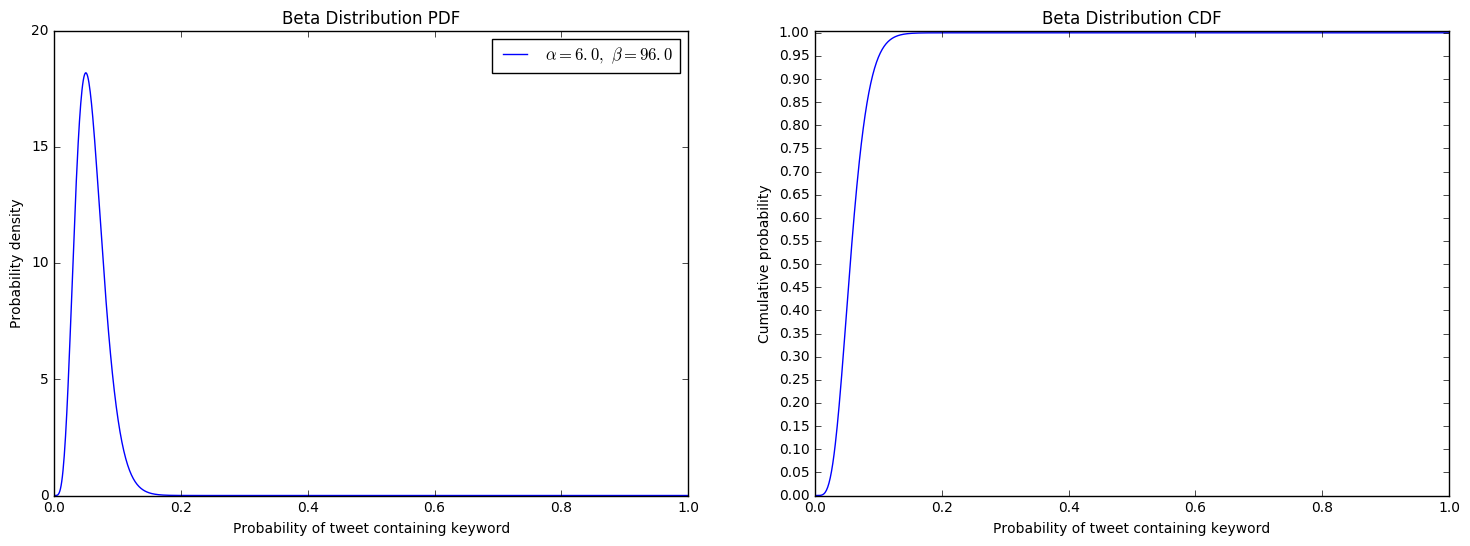

In [12]:
plt.figure(figsize=(18, 6))

# PDF
plt.subplot(121)

plt.plot(x_values, pdf_y_values, label=(r'$\alpha=%.1f,\ \beta=%.1f$' % (alpha, beta)))

plt.xlim(0, 1)
plt.xlabel('Probability of tweet containing keyword')
plt.ylabel('Probability density')
plt.title('Beta Distribution PDF')
plt.legend(loc=1)


# CDF
plt.subplot(122)

plt.plot(x_values, cdf_y_values)

plt.xlim(0, 1)
plt.ylim(0, 1.005)
plt.yticks(np.linspace(0, 1, 21))
plt.xlabel('Probability of tweet containing keyword')
plt.ylabel('Cumulative probability')
plt.title('Beta Distribution CDF')

plt.show()

# Comunicar resultados

### Con 90% de certeza, digamos que la verdadera probabilidad:

In [13]:
fifth_percentile = max(
    [x_value for x_value, y_value in zip(x_values, cdf_y_values) if y_value <= .05]
)

ninety_fifth_percentile = max(
    [x_value for x_value, y_value in zip(x_values, cdf_y_values) if y_value <= .95]
)

In [14]:
print('Con 90% de certeza digamos que la verdadera probabilidad se encuentra entre: {} y {}'.format(
    round(fifth_percentile, 4), round(ninety_fifth_percentile, 4)))

Con 90% de certeza digamos que la verdadera probabilidad se encuentra entre: 0.025 y 0.0999


### La probabilidad que la verdadera probabilidad (de que un tweet contiene nuesta palabra clave) sea más grande de .1:

In [16]:
def compute_total_probability_that_probability_less_than_p(p):
    return max(cumulative_prob for cumulative_prob, x_value in zip(cdf_y_values, x_values) if x_value < p)

In [17]:
print('La probabilidad que la verdadera probabilidad es > .1 es: {}'.format(
    1 - compute_total_probability_that_probability_less_than_p(.1))
)

La probabilidad que la verdadera probabilidad es > .1 es: 0.05283081449236815
